In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale= 1./255,horizontal_flip = True,vertical_flip = True,zoom_range = 0.2)

In [3]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [4]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/ibm/Flowers-Dataset/flowers",target_size = (64,64),
                                            class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/ibm/Flowers-Dataset/flowers",target_size = (64,64),
                                                                                      class_mode = "categorical",batch_size = 24)

Found 4317 images belonging to 5 classes.


In [7]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [9]:
model=Sequential()

In [10]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [12]:
model.add(Dense(5,activation='softmax'))
len(x_train)

180

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [14]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
180/180 [==============================] - 1023s 6s/step - loss: 1.4509 - accuracy: 0.4355 - val_loss: 1.0994 - val_accuracy: 0.5492
Epoch 2/10
180/180 [==============================] - 57s 319ms/step - loss: 1.0781 - accuracy: 0.5729 - val_loss: 1.0318 - val_accuracy: 0.5884
Epoch 3/10
180/180 [==============================] - 58s 320ms/step - loss: 0.9860 - accuracy: 0.6166 - val_loss: 1.1772 - val_accuracy: 0.5590
Epoch 4/10
180/180 [==============================] - 57s 316ms/step - loss: 0.9507 - accuracy: 0.6261 - val_loss: 0.9697 - val_accuracy: 0.6375
Epoch 5/10
180/180 [==============================] - 57s 318ms/step - loss: 0.9076 - accuracy: 0.6551 - val_loss: 0.8539 - val_accuracy: 0.6782
Epoch 6/10
180/180 [==============================] - 57s 316ms/step - loss: 0.8513 - accuracy: 0.6750 - val_loss: 0.9370 - val_accuracy: 0.6414
Epoch 7/10
180/180 [==============================] - 57s 319ms/step - loss: 0.8148 - accuracy: 0.6852 - val_loss: 0.8394 - val_acc

In [15]:
model.save('IBM_flowers.h5')

In [16]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [17]:
model=load_model('IBM_flowers.h5')

In [18]:
img=image.load_img(r'/content/drive/MyDrive/ibm/Flowers-Dataset/flowers/daisy/10172379554_b296050f82_n.jpg')

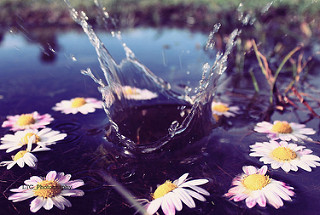

In [19]:
img

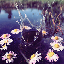

In [20]:
img=image.load_img(r'/content/drive/MyDrive/ibm/Flowers-Dataset/flowers/daisy/10172379554_b296050f82_n.jpg',target_size=(64,64))
img

In [21]:
x=image.img_to_array(img)
x

array([[[120., 120., 108.],
        [ 97.,  87.,  88.],
        [109.,  99.,  98.],
        ...,
        [124., 136., 114.],
        [163., 172., 153.],
        [138., 143., 121.]],

       [[ 95.,  88.,  96.],
        [ 68.,  48.,  73.],
        [ 89.,  75.,  90.],
        ...,
        [132., 146., 133.],
        [112., 121., 104.],
        [113., 125., 105.]],

       [[ 89.,  76.,  94.],
        [ 83.,  70.,  87.],
        [ 83.,  77.,  87.],
        ...,
        [105., 104.,  99.],
        [112., 121., 104.],
        [105., 111.,  97.]],

       ...,

       [[ 22.,   7.,  38.],
        [ 23.,   8.,  39.],
        [ 22.,   3.,  31.],
        ...,
        [ 39.,  16.,  70.],
        [ 46.,  21.,  79.],
        [ 47.,  21.,  82.]],

       [[ 26.,  11.,  40.],
        [ 23.,   8.,  37.],
        [ 24.,  15.,  44.],
        ...,
        [ 38.,  17.,  73.],
        [ 42.,  18.,  76.],
        [ 45.,  19.,  80.]],

       [[ 24.,   8.,  37.],
        [ 26.,  10.,  39.],
        [ 26.,  

In [22]:
x=np.expand_dims(x,axis=0)
x

array([[[[120., 120., 108.],
         [ 97.,  87.,  88.],
         [109.,  99.,  98.],
         ...,
         [124., 136., 114.],
         [163., 172., 153.],
         [138., 143., 121.]],

        [[ 95.,  88.,  96.],
         [ 68.,  48.,  73.],
         [ 89.,  75.,  90.],
         ...,
         [132., 146., 133.],
         [112., 121., 104.],
         [113., 125., 105.]],

        [[ 89.,  76.,  94.],
         [ 83.,  70.,  87.],
         [ 83.,  77.,  87.],
         ...,
         [105., 104.,  99.],
         [112., 121., 104.],
         [105., 111.,  97.]],

        ...,

        [[ 22.,   7.,  38.],
         [ 23.,   8.,  39.],
         [ 22.,   3.,  31.],
         ...,
         [ 39.,  16.,  70.],
         [ 46.,  21.,  79.],
         [ 47.,  21.,  82.]],

        [[ 26.,  11.,  40.],
         [ 23.,   8.,  37.],
         [ 24.,  15.,  44.],
         ...,
         [ 38.,  17.,  73.],
         [ 42.,  18.,  76.],
         [ 45.,  19.,  80.]],

        [[ 24.,   8.,  37.],
       

In [23]:
y=np.argmax(model.predict(x),axis=1)
y

array([2])

In [24]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [25]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [26]:
index[y[0]]

'rose'